## EDA & Pre-processing (removing all non-numeric entries from numeric columns)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
original_car_df = pd.read_csv("cars-dataset.csv")

original_car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
original_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [4]:
# from info it is clear that, 'car name' and 'hp' column contains non numeric data. 
# converting 'hp' column to numeric

In [5]:
original_car_df['hp'] = original_car_df['hp'].apply(pd.to_numeric, errors='coerce')

In [6]:
original_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


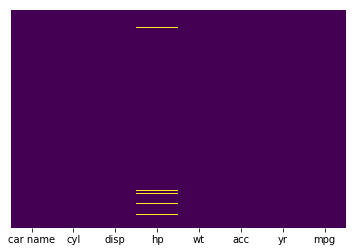

In [7]:
# checking missing value
sns.heatmap(original_car_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
original_car_df['hp'].fillna(original_car_df['hp'].median(), inplace=True)

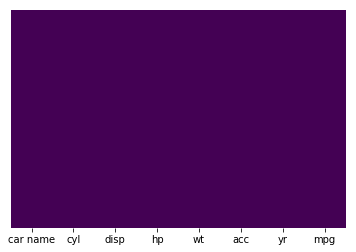

In [9]:
# checking missing value
sns.heatmap(original_car_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
original_car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [11]:
# droping mpg column as it is target varibale
car_df = original_car_df.drop('mpg', axis=1)

In [12]:
# as 'car name' is just an identifier for each row we can drop the column
car_df_attributes = car_df.drop("car name", axis=1)

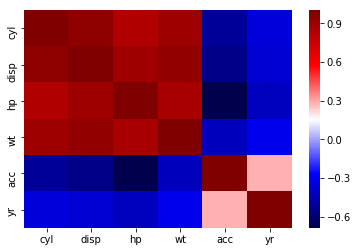

In [13]:
sns.heatmap(car_df_attributes.corr(), cmap='seismic')

##  pair plot and scatter matrix to visualize how the different variables are related

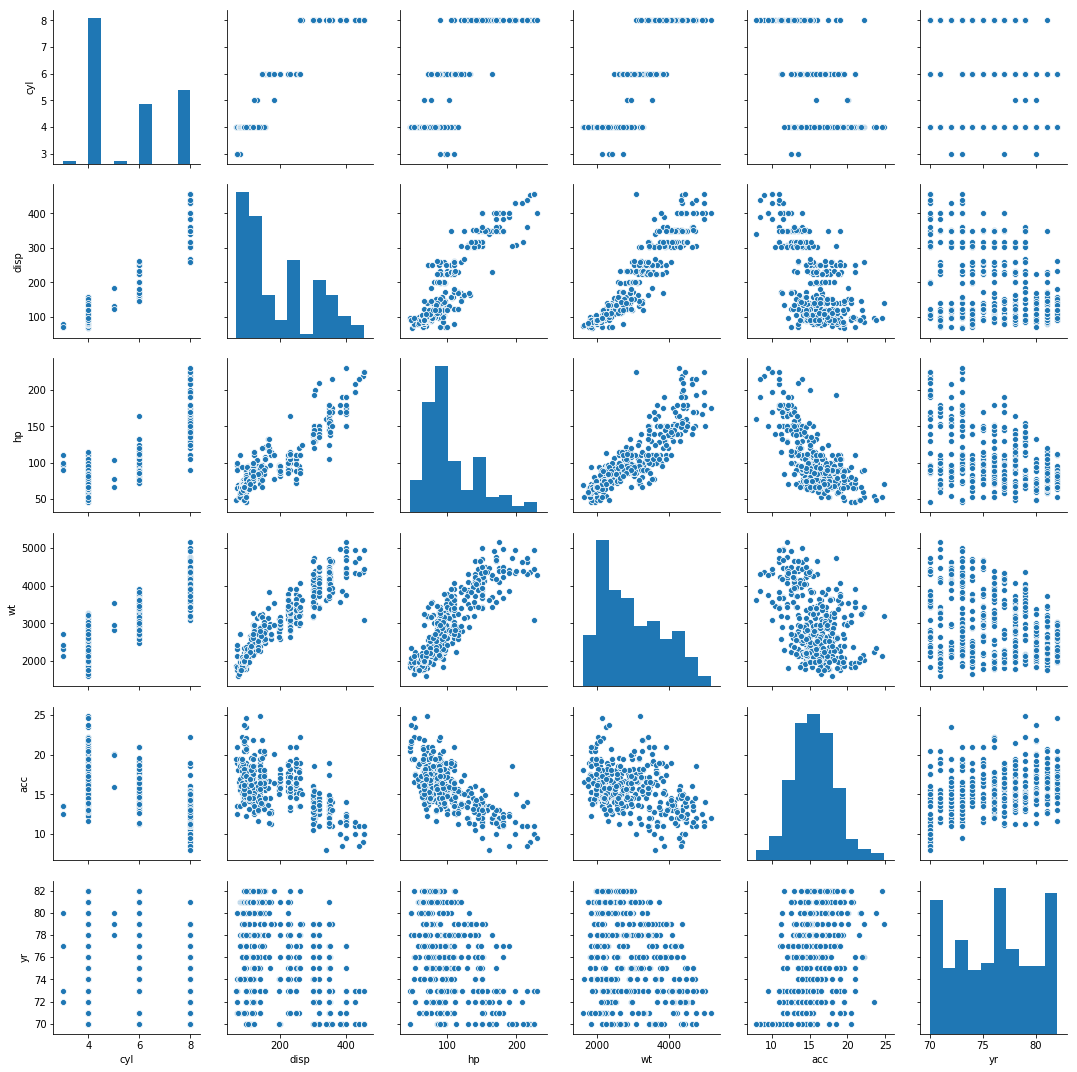

In [14]:
sns.pairplot(car_df_attributes)

## K Means clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

In [15]:
# scaling variables
car_df_attributes = car_df_attributes.apply(zscore)
car_df_attributes.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [16]:
#Finding optimal no. of clusters
clusters=range(1,15)
meanDistortions=[]

In [17]:
# checking istortions for  15 clusters
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_df_attributes)
    prediction=model.predict(car_df_attributes)
    distortions = sum(np.min(cdist(car_df_attributes, model.cluster_centers_, 'euclidean'), axis=1))
    meanDistortions.append( distortions / car_df.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

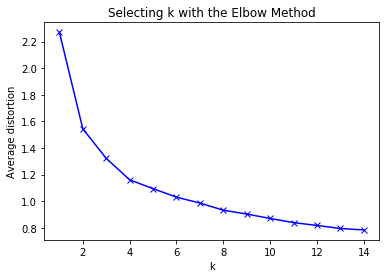

In [18]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### It seems from above elbow curve that, the bends are at 2 and 4, so will test for clusters 2,3,4,5

In [19]:
# Let us first start with K = 2
model2=KMeans(n_clusters=2, n_init=15, random_state=149)
model2.fit(car_df_attributes)
prediction2=model2.predict(car_df_attributes)

In [20]:
#Append the prediction 
car_df2 = original_car_df
car_df2["GROUP"] = prediction2

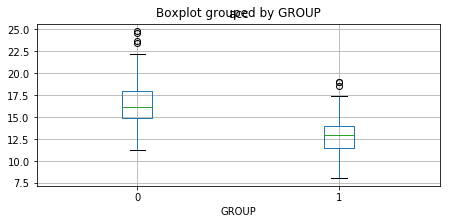

In [21]:
car_df2.boxplot(column='acc', by = 'GROUP',  figsize=(7,3))

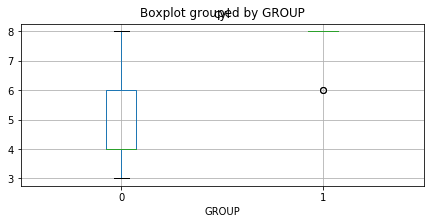

In [22]:
car_df2.boxplot(column='cyl', by = 'GROUP',  figsize=(7,3))

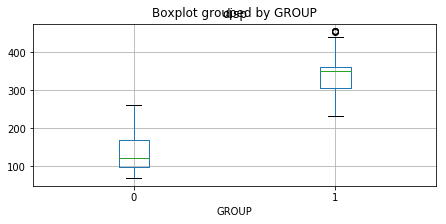

In [23]:
car_df2.boxplot(column='disp', by = 'GROUP',  figsize=(7,3))

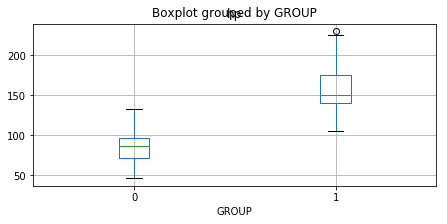

In [24]:
car_df2.boxplot(column='hp', by = 'GROUP',  figsize=(7,3))

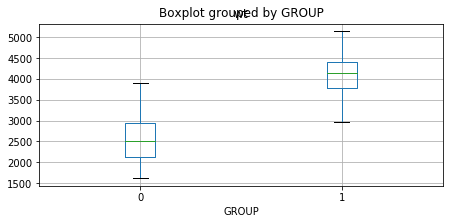

In [25]:
car_df2.boxplot(column='wt', by = 'GROUP',  figsize=(7,3))

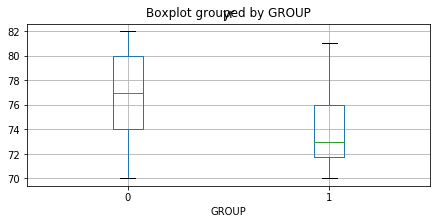

In [26]:
car_df2.boxplot(column='yr', by = 'GROUP', figsize=(7, 3))

In [27]:
# The K = 2 boxplot clearly shows outliers in group 1. Indicating that the group 1 is stretched also there is 
# no clear distance between groups. indicating probability of another cluster. Let us try with K = 3, the next elbow point

In [28]:
# K = 3
model3=KMeans(n_clusters=3, n_init=15, random_state=149)
model3.fit(car_df_attributes)
prediction3=model3.predict(car_df_attributes)

In [29]:
#Append the prediction
car_df3 = original_car_df
car_df3["GROUP"] = prediction3

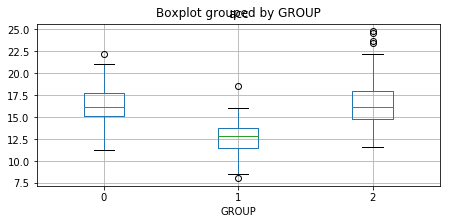

In [30]:
car_df3.boxplot(column='acc', by = 'GROUP',  figsize=(7,3))

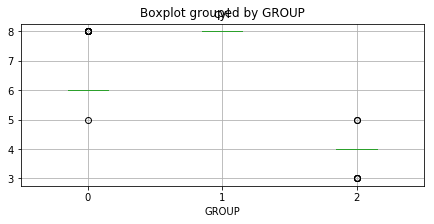

In [31]:
car_df3.boxplot(column='cyl', by = 'GROUP',  figsize=(7,3))

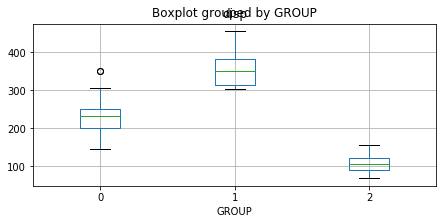

In [32]:
car_df3.boxplot(column='disp', by = 'GROUP',  figsize=(7,3))

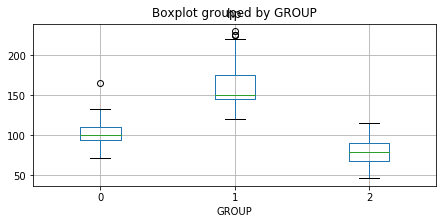

In [33]:
car_df3.boxplot(column='hp', by = 'GROUP',  figsize=(7,3))

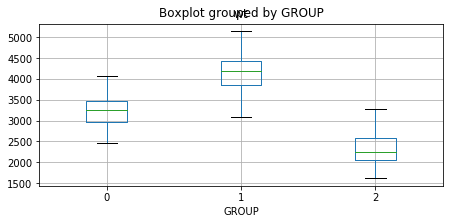

In [34]:
car_df3.boxplot(column='wt', by = 'GROUP',  figsize=(7,3))

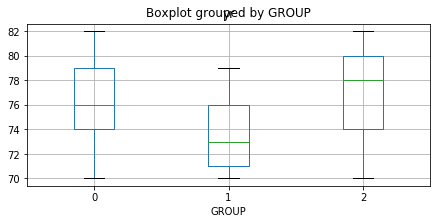

In [35]:
car_df3.boxplot(column='yr', by = 'GROUP',  figsize=(7,3))

In [36]:
# Let us try with K = 4, the next elbow point

In [37]:
model4=KMeans(n_clusters=4, n_init=15, random_state=149)
model4.fit(car_df_attributes)
prediction4=model4.predict(car_df_attributes)

In [38]:
#Append the prediction 
car_df4 = original_car_df
car_df4["GROUP"] = prediction4

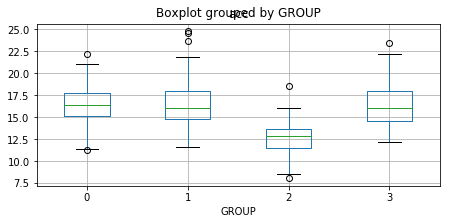

In [39]:
car_df4.boxplot(column='acc', by = 'GROUP',  figsize=(7,3))

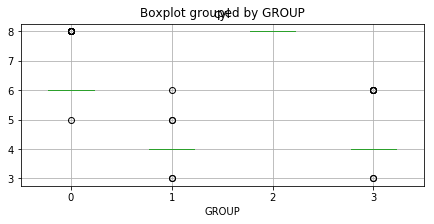

In [40]:
car_df4.boxplot(column='cyl', by = 'GROUP',  figsize=(7,3))

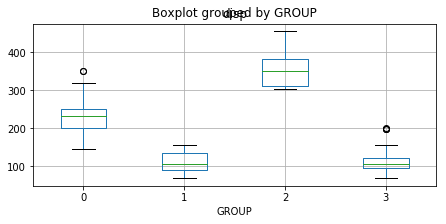

In [41]:
car_df4.boxplot(column='disp', by = 'GROUP',  figsize=(7,3))

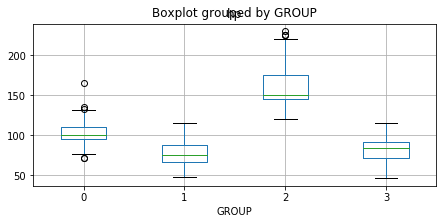

In [42]:
car_df4.boxplot(column='hp', by = 'GROUP',  figsize=(7,3))

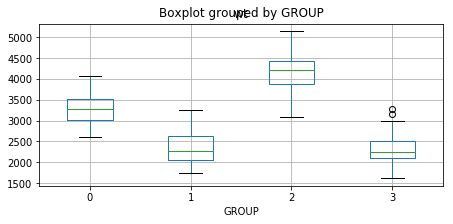

In [43]:
car_df4.boxplot(column='wt', by = 'GROUP',  figsize=(7,3))

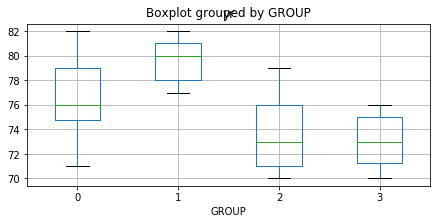

In [44]:
car_df4.boxplot(column='yr', by = 'GROUP',  figsize=(7,3))

In [45]:
# Let us try with K = 5, the next elbow point

In [46]:
final_model=KMeans(n_clusters=5, n_init=15, random_state=149)
final_model.fit(car_df_attributes)
prediction5=final_model.predict(car_df_attributes)

In [47]:
#Append the prediction
car_df5 = original_car_df
car_df5["GROUP"] = prediction5

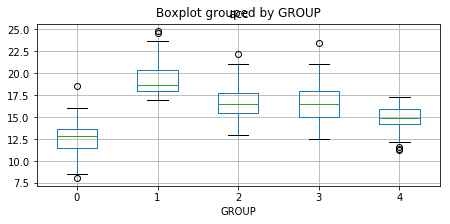

In [48]:
car_df5.boxplot(column='acc', by = 'GROUP',  figsize=(7,3))

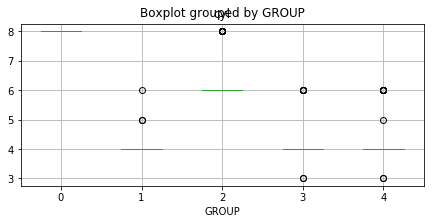

In [49]:
car_df5.boxplot(column='cyl', by = 'GROUP',  figsize=(7,3))

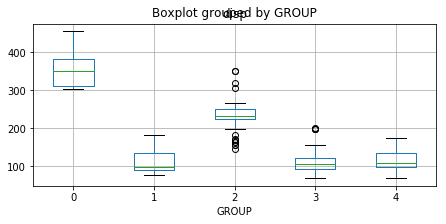

In [50]:
car_df5.boxplot(column='disp', by = 'GROUP',  figsize=(7,3))

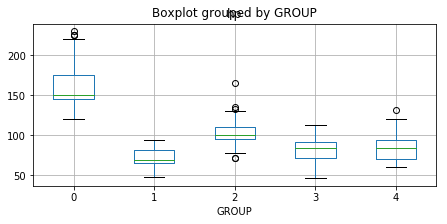

In [51]:
car_df5.boxplot(column='hp', by = 'GROUP',  figsize=(7,3))

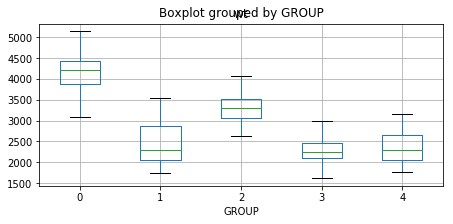

In [52]:
car_df5.boxplot(column='wt', by = 'GROUP',  figsize=(7,3))

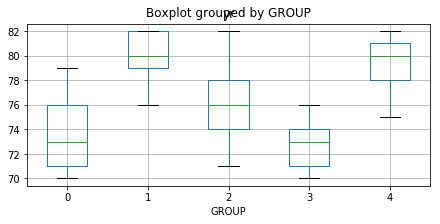

In [53]:
car_df5.boxplot(column='yr', by = 'GROUP',  figsize=(7, 3))

# from above analysis I conclude, when k=4, there is a good amount of segregation between clusters. 
# so I will use 4 clusters for further analysis

## Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [54]:
cluster1 = car_df4.loc[car_df4.GROUP==0]
cluster2 = car_df4.loc[car_df4.GROUP==1]
cluster3 = car_df4.loc[car_df4.GROUP==2]
cluster4 = car_df4.loc[car_df4.GROUP==3]

print(cluster1.sample(5))
print(cluster2.sample(5))
print(cluster3.sample(5))
print(cluster4.sample(5))

                    car name  cyl   disp     hp    wt   acc  yr   mpg  GROUP
224  mercury cougar brougham    8  302.0  130.0  4295  14.9  77  15.0      0
42         dodge monaco (sw)    8  383.0  180.0  4955  11.5  71  12.0      0
287    mercury grand marquis    8  351.0  138.0  3955  13.2  79  16.5      0
157        chevrolet bel air    8  350.0  145.0  4440  14.0  75  15.0      0
74     ford gran torino (sw)    8  302.0  140.0  4294  16.0  72  13.0      0
                car name  cyl   disp    hp    wt   acc  yr   mpg  GROUP
326   vw dasher (diesel)    4   90.0  48.0  2335  23.7  80  43.4      1
379       mercury lynx l    4   98.0  70.0  2125  17.3  82  36.0      1
358            mazda 626    4  120.0  74.0  2635  18.3  81  31.6      1
327  audi 5000s (diesel)    5  121.0  67.0  2950  19.9  80  36.4      1
392     chevrolet camaro    4  151.0  90.0  2950  17.3  82  27.0      1
                              car name  cyl   disp     hp    wt   acc  yr  \
283                   amc con

In [55]:
# I will not consider below  columns for regression 
# car name column - as it just identifies the data like an index
# Group column- as it is the cluster id

In [56]:
# Linear Regression for cluster 1

In [57]:
x1 = cluster1.drop(columns=['car name', 'mpg','GROUP'], axis=1)
y1 = cluster1['mpg'] 

In [58]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=1)

In [59]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)

Slope: [ 0.00000000e+00  4.05600241e-04 -3.41165392e-02 -1.29230538e-03
 -4.74082429e-01  3.11220845e-01]
Intercept: 8.368607100415083


In [61]:
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  2.823905434294062
R2 score:  0.312251830137814


In [62]:
# Linear Regression for cluster 2

In [63]:
x2 = cluster2.drop(columns=['car name', 'mpg','GROUP'], axis=1)
y2 = cluster2['mpg'] 

In [64]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=1)

In [65]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print('Slope:' ,regression_model2.coef_)
print('Intercept:', regression_model2.intercept_)

Slope: [ 3.71767552e-01 -4.57099653e-02 -3.85600752e-01  4.13769844e-04
 -3.61620638e-01  1.35389985e+00]
Intercept: -39.55277730437739


In [67]:
# Predict
y_predicted2 = regression_model2.predict(X_test2)

# model evaluation
rmse_2 = mean_squared_error(y_test2, y_predicted2)
r2_2 = r2_score(y_test2, y_predicted2)
print('Root mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Root mean squared error:  6.530651814482007
R2 score:  0.8263784173893883


In [68]:
# Linear Regression for cluster 3

In [69]:
x3 = cluster3.drop(columns=['car name', 'mpg','GROUP'], axis=1)
y3 = cluster3['mpg'] 

In [70]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=125)

In [71]:
regression_model3 = LinearRegression()
regression_model3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
print('Slope:' ,regression_model3.coef_)
print('Intercept:', regression_model3.intercept_)

Slope: [ 0.90974017  0.00804157 -0.02037115 -0.00453684 -0.01438151  0.40353168]
Intercept: -1.5060434764785384


In [73]:
# Predict
y_predicted3 = regression_model3.predict(X_test3)

# model evaluation
rmse_3 = mean_squared_error(y_test3, y_predicted3)
r2_3 = r2_score(y_test3, y_predicted3)
print('Root mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Root mean squared error:  12.695056958244693
R2 score:  0.3554761708376645


In [74]:
# Linear Regression for cluster 4

In [75]:
x4 = cluster4.drop(columns=['car name', 'mpg','GROUP'], axis=1)
y4 = cluster4['mpg'] 

In [76]:
# Split X and y into training and test set in 75:25 ratio

X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3, random_state=15)

In [77]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model4 = LinearRegression()
regression_model4.fit(X_train4, y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
print('Slope:' ,regression_model4.coef_)
print('Intercept:', regression_model4.intercept_)

Slope: [ 1.42182431 -0.04521855 -0.03501669 -0.00641294 -0.30916812  0.1504563 ]
Intercept: 35.837050806119166


In [79]:
# Predict
y_predicted4 = regression_model.predict(X_test4)

# model evaluation
rmse_4 = mean_squared_error(y_test4, y_predicted4)
r2_4 = r2_score(y_test4, y_predicted4)
print('Root mean squared error: ', rmse_4)
print('R2 score: ', r2_4)

Root mean squared error:  80.0007113259209
R2 score:  -3.8544120950194722
